### Descrição do Projeto:
Você trabalha para a loja online Ice, que vende videogames no mundo todo. As avaliações de usuários e especialistas, gêneros, plataformas (por exemplo, Xbox ou PlayStation) e dados históricos sobre vendas de jogos estão disponíveis em fontes abertas. Você precisa identificar padrões que determinam se um jogo tem sucesso ou não. Isso vai permitir que você identifique possíveis sucessos e planeje campanhas publicitárias.

Os dados disponibilizados remontam a 2016. Vamos imaginar que estamos em dezembro de 2016 e você está planejando uma campanha para 2017.

O conjunto de dados contém uma coluna de "rating" (classificação) que armazena a classificação ESRB de cada jogo. O Entertainment Software Rating Board avalia o conteúdo de um jogo e atribui uma classificação etária, como Teen (Adolescente) ou Mature (Adulto).

Descrição de dados
—Name (nome)

—Platform (plataforma)

—Year_of_Release (Ano de lançamento)

—Genre (gênero)

—NA_sales (vendas norte-americanas em milhões de USD)

—EU_sales (vendas na Europa em milhões de USD)

—JP_sales (vendas no Japão em milhões de USD)

—Other_sales (vendas em outros países em em milhões de USD)

—Critic_Score (Pontuação crítica) (máximo de 100)

—User_Score (Pontuação do usuário) (máximo de 10)

—Classificação (ESRB)

Os dados de 2016 podem estar incompletos.

####  Análise os dados

Veja quantos jogos foram lançados em anos diferentes Os dados de cada período são significativos?
Veja como as vendas variaram de plataforma para plataforma. Escolha as plataformas com as maiores vendas totais e construa uma distribuição com base em dados para cada ano. Encontre as plataformas que costumavam ser populares, mas agora não têm vendas. Quanto tempo leva para as novas plataformas aparecerem e as antigas desaparecerem?
Determine para qual período você deve pegar dados. Para fazê-lo, olhe para suas respostas para as perguntas anteriores. Os dados te deveriam permitir construir um modelo para 2017.
Trabalhar apenas com os dados que você decidiu que são relevantes. Desconsidere os dados de anos anteriores.
Quais plataformas estão liderando em vendas? Quais estão crescendo ou diminuindo? Selecione várias plataformas potencialmente lucrativas.
Construa um diagrama de caixa para as vendas globais de todos os jogos, divididos por plataforma. As diferenças nas vendas são significativas? E quanto às vendas médias em várias plataformas? Descreva suas descobertas.
Veja como as avaliações de usuários e profissionais afetam as vendas de uma plataforma popular (você escolhe). Construa um gráfico de dispersão e calcule a correlação entre revisões e vendas. Tire conclusões.
Com essas conclusões em mente, compare as vendas em outras plataformas.
Dê uma olhada na distribuição geral de jogos por gênero. O que podemos dizer sobre os gêneros mais lucrativos? Você pode generalizar sobre gêneros com vendas altas e baixas?
Etapa 4. Crie um perfil de usuário para cada região

Para cada região (AN, UE, JP), determine:

As cinco plataformas principais. Descreva as variações das suas quotas de mercado de região para região.
Os cinco principais gêneros. Explique a diferença.
As classificações do ESRB afetam as vendas em regiões individuais?
Etapa 5. Teste as seguintes hipóteses:

— As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.

— As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.

Defina o valor do limiar alfa você mesmo.

Explique:

— Como você formula as hipóteses alternativas e nulas.

— Quais critérios você usou para testar as hipóteses, e por quê

Etapa 6. Escreva uma conclusão geral

Formato: Complete a tarefa no Jupyter Notebook. Insira o código nas células code e textos de explicação nas células markdown. Aplique a formatação e adicione títulos.

Instruções para concluir o projeto
Etapa 1. Abra o arquivo de dados e estude as informações gerais

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('/datasets/games.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
print(df.head(10))

                        Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

   NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     41.36     28.96      3.77         8.45          76.0          8      E  
1     29.08      3.58      6.81         0.77     

#### Resposta do Aluno: Etapa 1 Concluída

Etapa 2. Prepare os dados

Substituir os nomes das colunas (transformar tudo em minúsculos).
Converta os dados para os tipos necessários.
Descreva as colunas onde os tipos de dados foram alterados e por quê.
Se necessário, decida como lidar com valores ausentes:

Explique por que você preencheu os valores ausentes da forma que você fez ou por que você decidiu deixá-los em branco.

Por que acha que os valores estão ausentes? Dê possíveis razões.

Preste atenção à abreviação TBD (a ser determinada). Especifique como pretende lidar com esses casos.

Calcule o total de vendas (a soma das vendas em todas as regiões) para cada jogo e coloque esses valores em uma coluna separada.

In [6]:
df.columns = df.columns.str.lower()

In [7]:
print(df.head(1))

         name platform  year_of_release   genre  na_sales  eu_sales  jp_sales  \
0  Wii Sports      Wii           2006.0  Sports     41.36     28.96      3.77   

   other_sales  critic_score user_score rating  
0         8.45          76.0          8      E  


In [8]:
# vejo que os valores ausentes das colunas "score" podemos utilizar uma média, para preencher esses valores ausentes, visto que é uma quantidade relativamente grande para ser ignorado.
# verifiquei que a coluna 'user_score' está como o tipo object, precisa converter.

df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce') #conversão coluna 'user_score' p/ float

critic_mean = df['critic_score'].mean() # média da coluna 'critic_score'
user_mean = df['user_score'].mean() # média da coluna 'user_score' 
print(critic_mean, user_mean)

df['critic_score'] = df['critic_score'].fillna(critic_mean) # substituindo os valores ausentes pela variável critic_mean
df['user_score'] = df['user_score'].fillna(user_mean) # substituindo os valores ausentes pela variável user_mean

print(df.head())

68.96767850559173 7.125046113306982
                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  
0     28.96      3.77         8.45     76.000000    8.000000      E  
1      3.58      6.81         0.77     68.967679    7.125046    NaN  
2     12.76      3.79         3.29     82.000000    8.300000      E  
3     10.93      3.28         2.95     80.000000    8.000000      E  
4      8.89     10.22         1.00     68.967679    7.125046    NaN  


##### Resposta do Aluno: Olhando o DF, vejo que alguns jogos mais antigos, suas notas estão ausentes (antes de 2000), por isso estou usando a média, principalmente por esses jogos ter categoria e desenvolvedor em comum de outros presentes, então acredito ser um valor interessante que pode ser levado em consideração.

In [9]:
# Somatória total de vendas e inclusão de coluna 'total_sales' no DF:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
print(df.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45     76.000000    8.000000      E   
1      3.58      6.81         0.77     68.967679    7.125046    NaN   
2     12.76      3.79         3.29     82.000000    8.300000      E   
3     10.93      3.28         2.95     80.000000    8.000000      E   
4      8.89     10.22         1.00     68.967679    7.125046    NaN   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4

#### Resposta do Aluno: Etapa 2 Concluída

Etapa 3. Analise os dados

Veja quantos jogos foram lançados em anos diferentes Os dados de cada período são significativos?
Veja como as vendas variaram de plataforma para plataforma. Escolha as plataformas com as maiores vendas totais e construa uma distribuição com base em dados para cada ano. Encontre as plataformas que costumavam ser populares, mas agora não têm vendas. Quanto tempo leva para as novas plataformas aparecerem e as antigas desaparecerem?
Determine para qual período você deve pegar dados. Para fazê-lo, olhe para suas respostas para as perguntas anteriores. Os dados te deveriam permitir construir um modelo para 2017.
Trabalhar apenas com os dados que você decidiu que são relevantes. Desconsidere os dados de anos anteriores.
Quais plataformas estão liderando em vendas? Quais estão crescendo ou diminuindo? Selecione várias plataformas potencialmente lucrativas.
Construa um diagrama de caixa para as vendas globais de todos os jogos, divididos por plataforma. As diferenças nas vendas são significativas? E quanto às vendas médias em várias plataformas? Descreva suas descobertas.
Veja como as avaliações de usuários e profissionais afetam as vendas de uma plataforma popular (você escolhe). Construa um gráfico de dispersão e calcule a correlação entre revisões e vendas. Tire conclusões.
Com essas conclusões em mente, compare as vendas em outras plataformas.
Dê uma olhada na distribuição geral de jogos por gênero. O que podemos dizer sobre os gêneros mais lucrativos? Você pode generalizar sobre gêneros com vendas altas e baixas?

In [10]:
# ver quantidade de jogos lançados por ano:
year_games = df.groupby('year_of_release').count().sort_values(by='name', ascending=False) # quantidade de jogos por ano
print(year_games.head(10)) # top 10 anos com maior número de lançamentos

                 name  platform  genre  na_sales  eu_sales  jp_sales  \
year_of_release                                                        
2008.0           1427      1427   1427      1427      1427      1427   
2009.0           1426      1426   1426      1426      1426      1426   
2010.0           1255      1255   1255      1255      1255      1255   
2007.0           1197      1197   1197      1197      1197      1197   
2011.0           1136      1136   1136      1136      1136      1136   
2006.0           1006      1006   1006      1006      1006      1006   
2005.0            939       939    939       939       939       939   
2002.0            829       829    829       829       829       829   
2003.0            775       775    775       775       775       775   
2004.0            762       762    762       762       762       762   

                 other_sales  critic_score  user_score  rating  total_sales  
year_of_release                                          

In [11]:
# verificando as plataformas com maiores vendas:
top_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False) 
print(top_sales.head(10)) # top 10 maiores vendas

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64


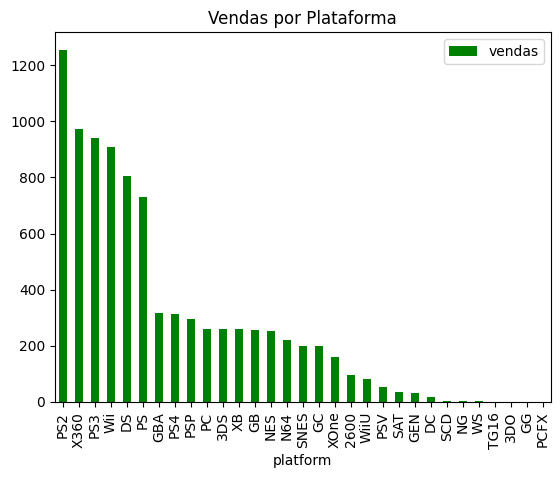

In [12]:
# fazendo um gráfico vendas:
top_sales.plot(kind='bar', color='green')
plt.legend(['vendas'])
plt.title('Vendas por Plataforma')
plt.show()

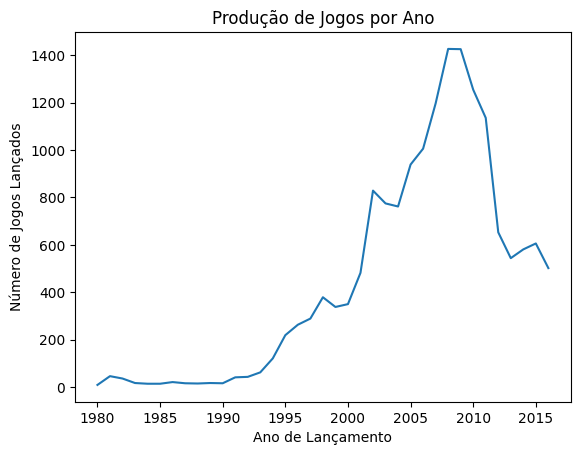

In [13]:
df.groupby('year_of_release')['platform'].count().plot()
plt.title('Produção de Jogos por Ano')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Número de Jogos Lançados')
plt.show()

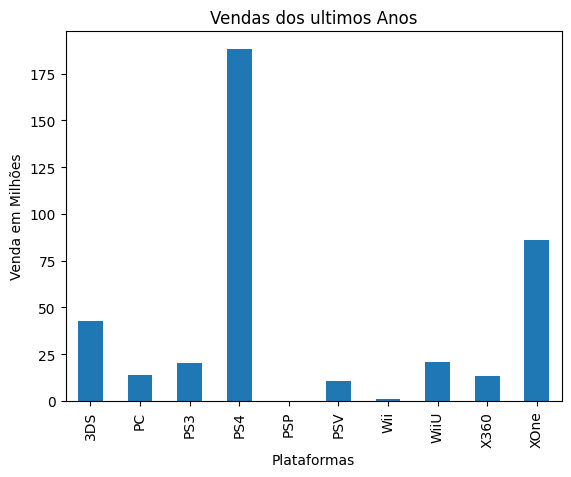

In [60]:
# Irei analisar os jogos/plataformas dos ultimos 3 anos (como projeção para 2017).
# Irei filtrar quais tiveram maior resultados nos anos anteriores, periodo depois de 2014

last_years = df[df['year_of_release'] > 2014]  #filtragem por data
last_years.groupby('platform')['total_sales'].sum().plot(kind='bar')
plt.title('Vendas dos ultimos Anos')
plt.xlabel('Plataformas')
plt.ylabel('Venda em Milhões')
plt.show()

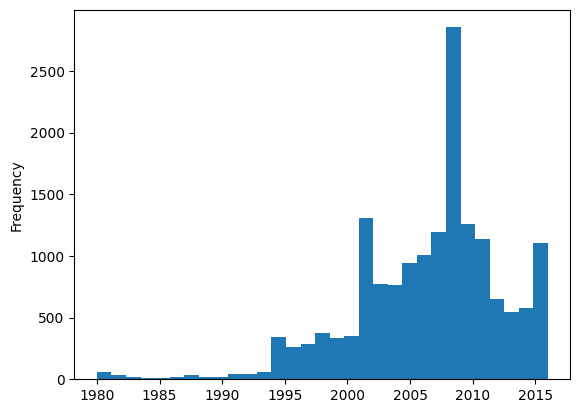

In [15]:
# histograma: Verificando a frequência (ciclo) de lançamentos 
df['year_of_release'].plot(kind='hist', bins=31)
plt.show()

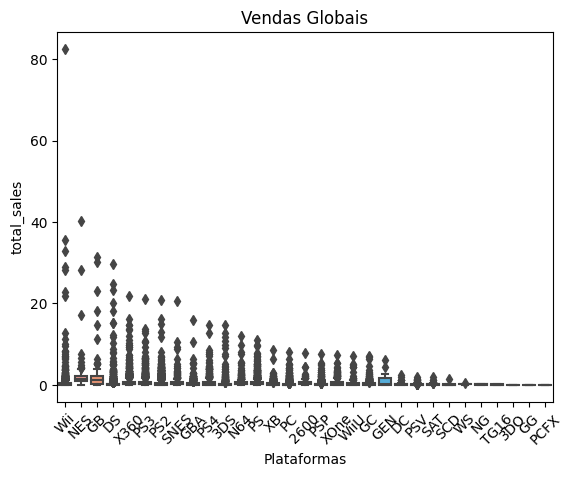

In [16]:
# boxplot
sns.boxplot(x='platform', y='total_sales', data=df)
plt.title('Vendas Globais')
plt.xlabel('Plataformas')
plt.xticks(rotation=45)
plt.show()

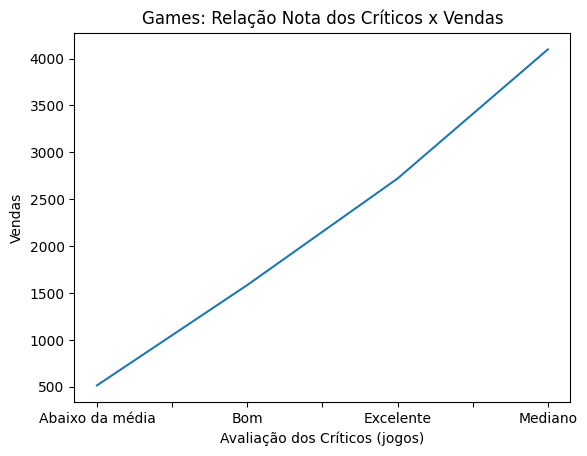

In [17]:
# Analisando os valores de critic_score e user_score e se tem alguma correlação as vendas:
def comparate(score):
    if score < 60:
        return 'Abaixo da média'
    elif 60 <= score <= 70:
        return 'Mediano'
    elif 70 < score <= 80:
        return 'Bom'
    elif score > 80:
        return 'Excelente'
    else:
        return 'Sem nota'

# Criando coluna com função acima:
df['critic_stats'] = df['critic_score'].apply(comparate)

df.groupby('critic_stats')['total_sales'].sum().plot()
plt.title('Games: Relação Nota dos Críticos x Vendas')
plt.xlabel('Avaliação dos Críticos (jogos)')
plt.ylabel('Vendas')
plt.show()


In [18]:
#verificando os generos mais vendidos:
genres = df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
print(genres)

genre
Action          1744.17
Sports          1331.27
Shooter         1052.45
Role-Playing     934.56
Platform         827.77
Misc             802.51
Racing           728.67
Fighting         447.53
Simulation       389.97
Puzzle           242.57
Adventure        237.59
Strategy         174.23
Name: total_sales, dtype: float64


##### Resposta do Aluno: Criei 2 graficos, podemos notar que o maior número de vendas, são das plataformas mais modernas. No mesmo período onde tivemos maior número de lançamentos, podemos realizar um teste estatístico para testar a hipótese que tivemos um maior número de vendas porque tivemos um maior número de lançamentos, podemos testar a hipotese nula e alternativa.
##### Aluno: Vemos as plataformas com maiores vendas no grafico de barras "Venda por Plataforma"
##### Aluno: Outro ponto importante é observar, que tem um ciclo de 5 anos, onde novos jogos são lançados, e outros passam a serem esquecidos.
##### Aluno: Aparentemente os jogos considerados medianos pelos criticos, tem maior venda do que os considerados Excelentes / Bons, contudo vale relembrar que parte das notas médias, foram incluídas inicialmente no DF nos valores NaN, lembrando que a grande maioria de valores ausentes, eram jogos antes dos anos 2000s. mais um ponto para analisar na hipotese Nula/Alternativa em relação ao número de venda dos novos modelos mencionado anteriormente.
##### Aluno: Podemos ver os gêneros mais jogados(vendidos), citando Ação, Esportes , tiro.. e estratégia sendo o menos jogado :,(

Etapa 4. Crie um perfil de usuário para cada região

Para cada região (AN, UE, JP), determine:

As cinco plataformas principais. Descreva as variações das suas quotas de mercado de região para região.
Os cinco principais gêneros. Explique a diferença.
As classificações do ESRB afetam as vendas em regiões individuais?

In [19]:
# Perfil Usuário JP
jp_platform = df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False) # ver plataformas mais jogadas
jp_genre = df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False) # ver generos mais jogados
print(jp_platform.head())
print()
print(jp_genre.head())

platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64

genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64


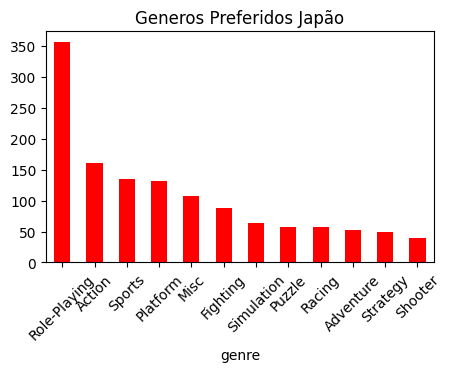

In [20]:
jp_genre.plot(kind='bar', color='red', rot=45, figsize=(5, 3))
plt.title('Generos Preferidos Japão')
plt.show()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64


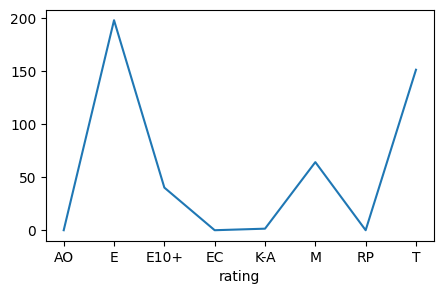

In [21]:
print(df['rating'].value_counts())

df.groupby('rating')['jp_sales'].sum().plot(figsize=(5,3))
plt.show()

platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64

genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64


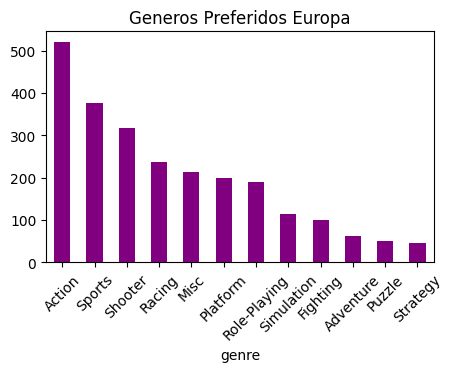

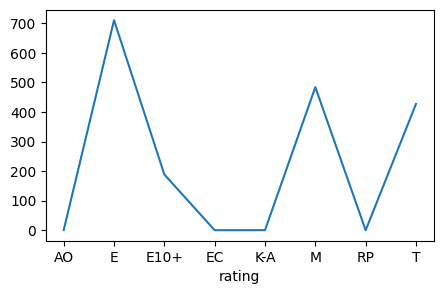

In [22]:
# Perfil Usuário EU:
eu_platform = df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
eu_genre = df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
print(eu_platform.head())
print()
print(eu_genre.head())

eu_genre.plot(kind='bar', color='purple', rot=45, figsize=(5, 3))
plt.title('Generos Preferidos Europa')
plt.show()

df.groupby('rating')['eu_sales'].sum().plot(figsize=(5,3))
plt.show()

platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64


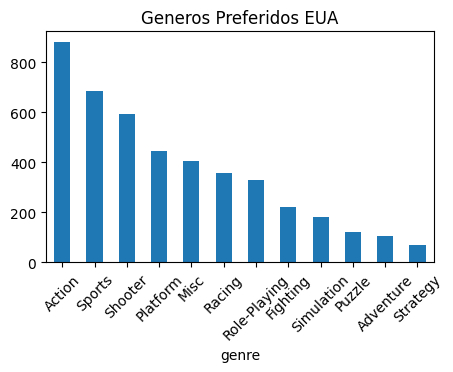

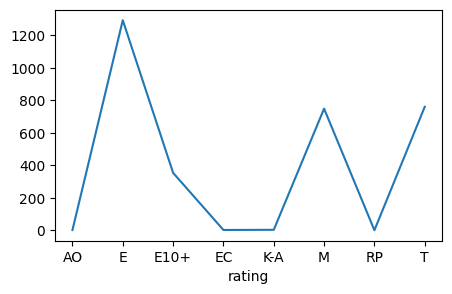

In [23]:
# Perfil Usuário AN:
na_platform = df.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
na_genre = df.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
print(na_platform.head())
print()
print(na_genre.head())

na_genre.plot(kind='bar', rot=45, figsize=(5, 3))
plt.title('Generos Preferidos EUA')
plt.show()

df.groupby('rating')['na_sales'].sum().plot(figsize=(5,3))
plt.show()

##### Resposta do Aluno: há diferença do perfil do usuário de cada região, principalmente usuários do japão, onde o role-playing e plataforma DS são os mais consumidos, já nas demais regiões genero Ação segue liderando a lista, porem mudando a preferência PS2 Europa, e X360 Americanos. classificações do ESRB proporcionalmente iguais.

Etapa 5. Teste as seguintes hipóteses:

— As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.

— As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.

Defina o valor do limiar alfa você mesmo.

Explique:

— Como você formula as hipóteses alternativas e nulas.

— Quais critérios você usou para testar as hipóteses, e por quê

In [24]:
#importando biblioteca para essa etapa:
from scipy import stats as st

In [25]:
# verificando a classificação média dos usúarios Xbox One e PC:

x_one_rating = df[df['platform'] == 'XOne']['user_score']  #1º conjunto de dados
pc_rating = df[df['platform'] == 'PC']['user_score'] #2º conjunto de dados
alpha = 0.05 # nível crítico de significância estatística
   
    # hipotese_nula: classificação média igual para ambas as plataformas
    # hipotese_alternativa: classificação média diferente

#teste:
results = st.ttest_ind(x_one_rating, pc_rating, equal_var = False)
print('valor-p:', results.pvalue)
if results.pvalue < alpha:
    print("rejeitar hipotese nula (classificação média igual)")
else:
    print("não podemos rejeitar hipotese nula (classificação média igual)")

valor-p: 1.0718459399074417e-05
rejeitar hipotese nula (classificação média igual)


#### Resposta do Aluno: Ou seja, existe diferença da classificação média entre os dois conjuntos de dados, PC e X One.

In [26]:
# verificando as classificações médias de usuários para os gêneros Action (ação) e Sports (esportes):
action_rating = df[df['genre'] == 'Action']['user_score']
sports_rating = df[df['genre'] == 'Sports']['user_score']
alpha = 0.05 # nível crítico de significância estatística
   
    # hipotese_nula: classificação média igual para ambas os gêneros
    # hipotese_alternativa: classificação média diferente

#teste:
results = st.ttest_ind(action_rating, sports_rating, equal_var = False)
print('valor-p:', results.pvalue)
if results.pvalue < alpha:
    print("rejeitar hipotese nula (classificação média igual)")
else:
    print("não podemos rejeitar hipotese nula (classificação média igual)")

valor-p: 0.18782272416195633
não podemos rejeitar hipotese nula (classificação média igual)


#### Resposta do Aluno: é igual a classificação média entre os dois generos, Ação e Esportes.

#### Resposta do Aluno: a formulação das hipoteses alternativas e nulas foram feitas, partindo do principio que temos duas populações (2 conjuntos de dados) onde a dúvida principal é se há igualdade de média entre ambos os conjuntos de dados, no caso, classificação dos usuarios para: duas plataformas distintas, e posteriormente, dois gêneros distintos, e em ambos os casos, a afirmativa que são iguais, podendo definir como hipótese nula, e se são médias diferentes, definindo como hipótese alternativa.

#### Resposta do Aluno: Utilizei como critério a hipótese sobre igualdade das médias de duas populações, onde relacionei classificação do PC x classificação X One. e classificação do gênero Ação x classificação do gênero Esporte, utilizando a biblioteca scipy e ttest para poder responder o teste de hipotese.

Etapa 6. Escreva uma conclusão geral

Formato: Complete a tarefa no Jupyter Notebook. Insira o código nas células code e textos de explicação nas células markdown. Aplique a formatação e adicione títulos.

### Resposta do Aluno: Conclusão Geral.

#### Resposta do Aluno: Após realizar tais levantamentos sobre os dados dos jogos, ficando mais nítido com a utilização dos graficos, podemos chegar em uma conclusão, que existe de fato distinção do consumo em ambos as regiões, principalmente para o usuário do Japão, ou seja é uma demanda diferente do público Europa e America do Norte. Verificamos que a avaliação dos críticos, se torna inconclusiva em relação as vendas, visto que temos um banco de dados dos games mais antigos, antes dos anos 2000's, sem avaliação, sendo uma quantidade relativamente alta, e interferindo no comparativo critic_score x vendas, pois a média foi preenchida nos valores ausentes como avaliado na análise exploratória. Levando em consideração, o dado de maiores vendas sendo as plataformas mais novas como PS2, XBOX, PS3... o comparativo de avaliação critíca se torna ineficaz para afirmar essa tese. pois podemos imaginar que jogos antigos, podem vender mais por estarem maior tempo no mercado. podemos verificar abaixo quais jogos mais vendeu e assim ver se isso reflete sobre essa teoria.

In [27]:
# Apenas por curiosidade:
campeoes_de_vendas = df.groupby('name')['total_sales'].sum().sort_values(ascending=False)
print('Os jogos que mais venderam no mundo:', campeoes_de_vendas.head(3))

Os jogos que mais venderam no mundo: name
Wii Sports            82.54
Grand Theft Auto V    56.58
Super Mario Bros.     45.31
Name: total_sales, dtype: float64
